# LAB 2 - School of Electrical and Information Engineering
## 1604145 - ELEN4022


In [1]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

# Introduction

This lab will focus on the construction of a quantum full adder circuit using object orientated programming.
Full adder circuits are integral in the addition of binary numbers and thus many digital tasks. A
full adder circuit takes in 2 binary inputs and a carry in bit and adds them together to get the
sum value and a carry-out bit.


## Full adder circuit
A full adder is a series of logic gates that prepare an output. The image below shows the gates needed to create a full adder.
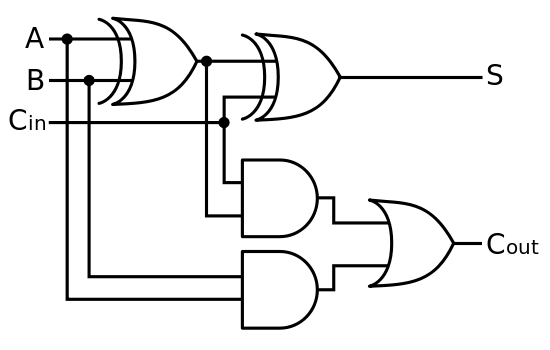

We start off with A and B, the input qubits for the circuit. A and B are put into the XOR gate and then another XOR gate with the carry in qubit to get the sum value of the circuit. The carry out bit is calculated by putting A and B into an and gate, as well as the output of the first XOR and the carry in bit into a second and gate. The results of both and gates are put into an or gate the output is the carry out qubit.

The logic expression for the sum bit is SUM = (A ${\otimes}$ B) ${\otimes}$ Carry-in. While the logic expression for the carry-out but is Carry-out = (A${\cdot}$B) + (carry-in${\cdot}$(A ${\otimes}$ B)). 

This gives you the answer of 2 bits added together. The truth table for full adder process can be found in the image below.


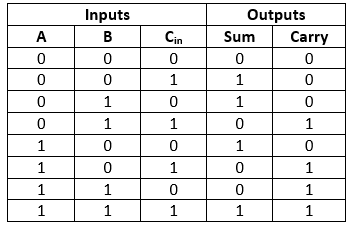

## Jupyter Code 

The addition of two numbers is done using a class. This class is initiated with 4 parameters: the first number a, the second number b, the number of qubits in the values, n and the quantum ciruit. The values a and b are inputed as strings representing binary numbers and n is an integer.

The class also defines a function add(). Add begines by defining the zero and one ket notation. A quantum circuit with 4 quantum registers and (n+1) classical registers is initialized. A for loop going from (n-1) to zero is started. In the for loop qubit 0&1 are set to either one or zero according the value fed in from the current poisition of a and b. The carry in bit, 2, is initially set to 0 state.

The 0 and 1 qubits are put into an AND gate via the toffoli gate, this result is stored in the carry out bit 3. If qubit 0 is one a x-gate is applied to qubit 1, this acheived by using a CNOT-gate on qubit 1 with qubit 0 being the control. A toffoli gate is applied on to qubit 1 and 2 and controls qubit 3, which will then give the final carry-out bit alongside the solution of the first toffoli gate. Lastly a CNOT gate is applied on qubit 2 with qubit 1 being the target, this creates an XOR between qubit 0,1 and 2, therefore giving the final sum value.

When the circuit is called to add the next bit the carry-out bit is feed into the carry in bit using the swap function, and qubit 3 is initialzed to state 0.


In [138]:
class addition:
    def __init__(self,a,b,n,qc):
        self.a=a
        self.b=b
        self.n=n
        self.qc=qc
        
    def add(self):
            one_state= [0,1]
            zero_state = [1,0]
            num = 0
            for i in reversed(range(self.n)):
                if self.a[i] == "1":
                    self.qc.initialize(one_state,0)
                else:
                    self.qc.initialize(zero_state,0)   
                if self.b[i] == "1":
                     self.qc.initialize(one_state,1)
                else:
                    self.qc.initialize(zero_state,1)  
            
            
                self.qc.initialize(zero_state,3)  
                self.qc.ccx(0,1,3)
                self.qc.cx(0,1)
                self.qc.ccx(1,2,3)
                self.qc.cx(1,2)
                
                
                self.qc.barrier()
                self.qc.measure(2,num)
                if i==0:
                    self.qc.measure(3,self.n)
                num=num+1
                self.qc.barrier()
                self.qc.swap(3,2)
                self.qc.barrier()

            return self.qc
    
    def draw(self):
        self.qc.draw('mpl')
        
    def printHist(self):
        sim = Aer.get_backend('qasm_simulator') 
        qobj = assemble(self.qc)
        result = sim.run(qobj).result() 
        counts = result.get_counts()
        plot_histogram(counts)
        return counts
    

In [139]:
n = 3
m=n + 1
qc=QuantumCircuit(4,m)
p1 = addition("100","001",n,qc)

## 3 Qubit Adder

Using the draw function written in the addition class, the 3 bit full adder is displayed below. The complete addition of the values is made up off 3 full adders. The output value displayed through the printHist function is a 4-bit value, with the first most left bit being the carryout bit. 

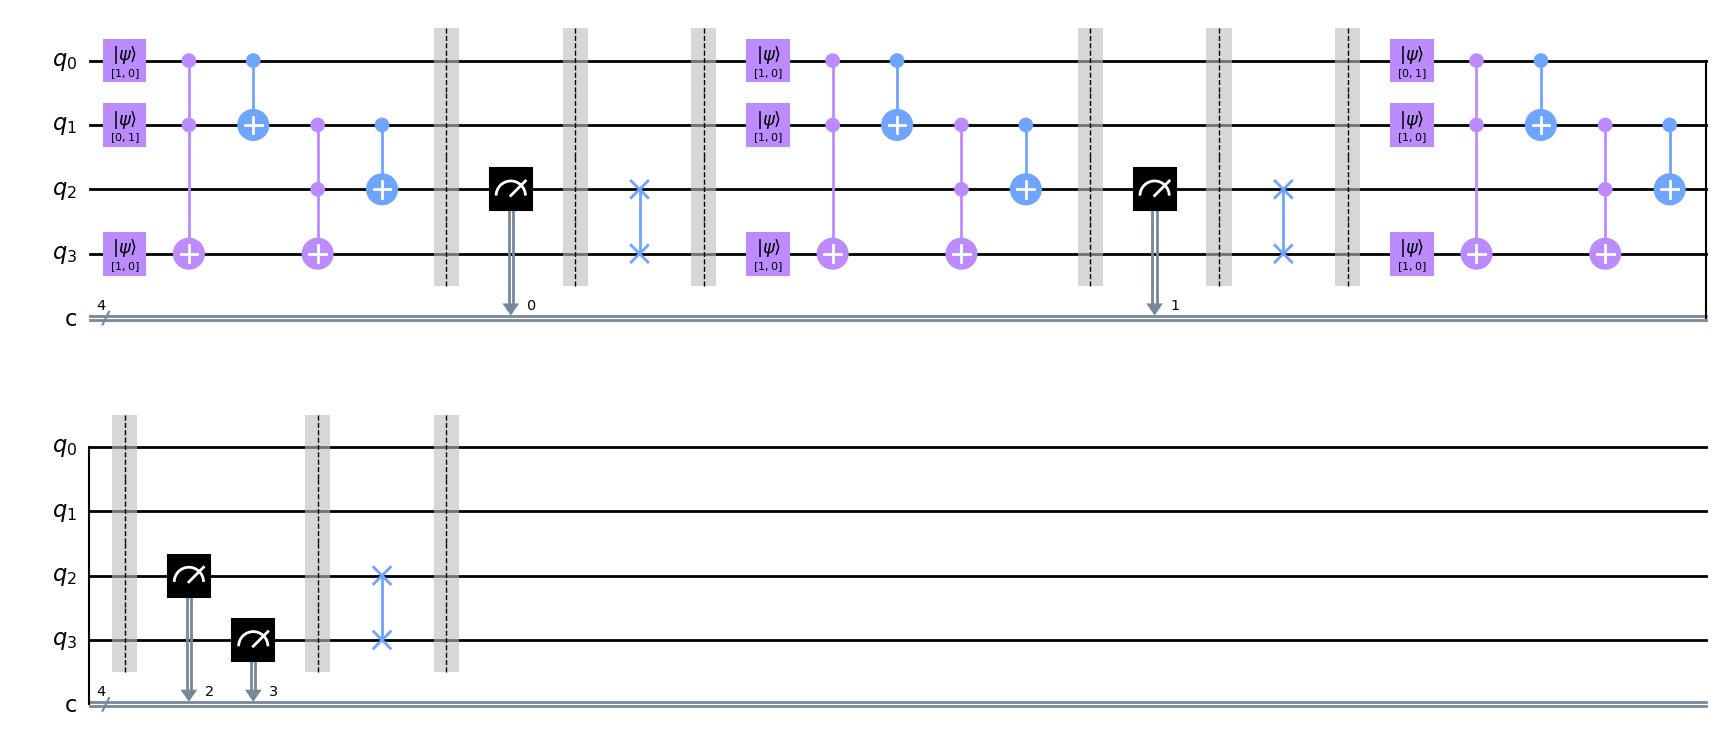

In [140]:
qcz=p1.add()
p1.draw()

The histogram displaying the final added number is displayed below using the printHist() function defined in the class.

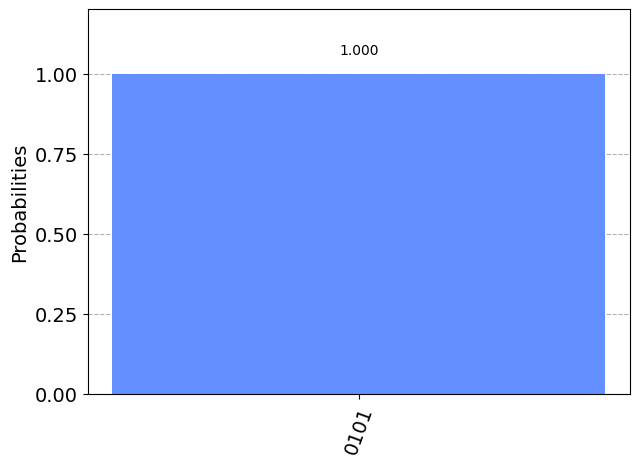

In [141]:
count1 = p1.printHist()


## 5 Qubit Adder
The 5 qubit adder is shown below. The adder is made up of 5 full adders in order to add two 5 qubit values.

In [130]:
n = 5
m=n + 1
qc=QuantumCircuit(4,m)
p2 = addition("00110","00010",n,qc)

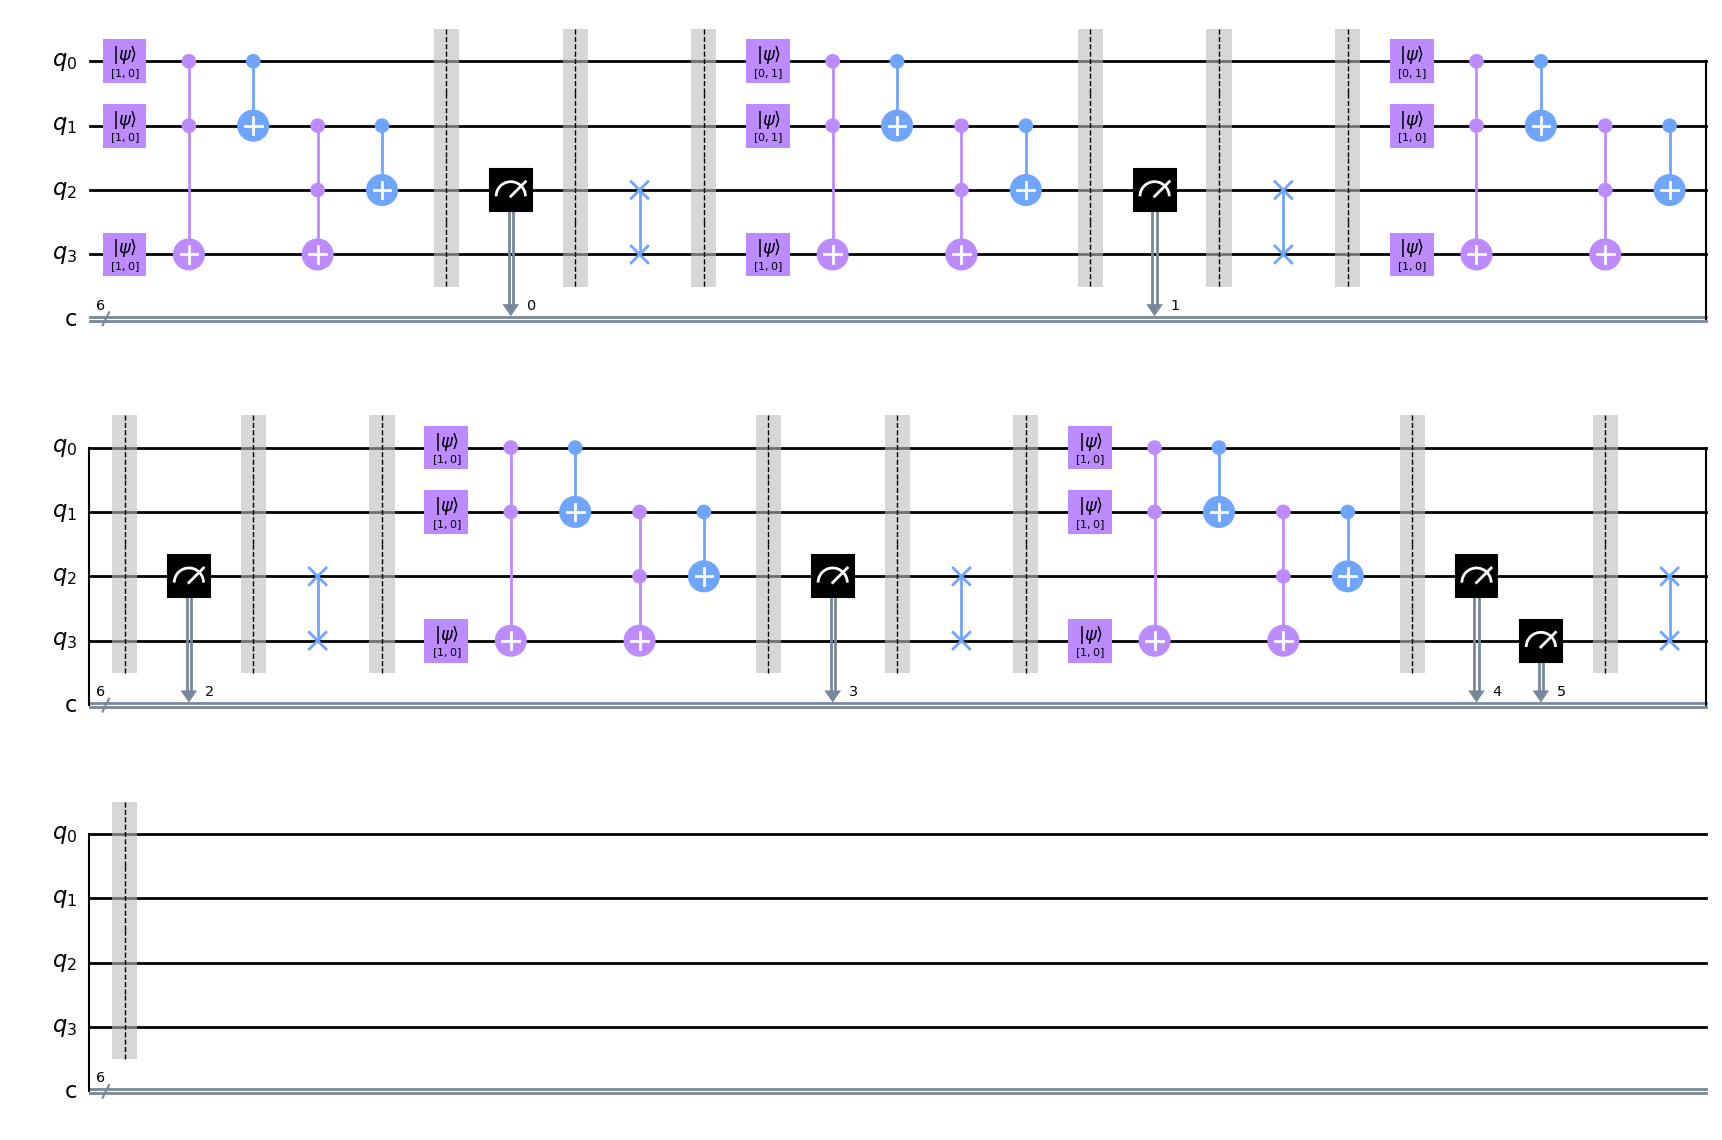

In [131]:
qcz2=p2.add()
p2.draw()

{'001000': 1024}

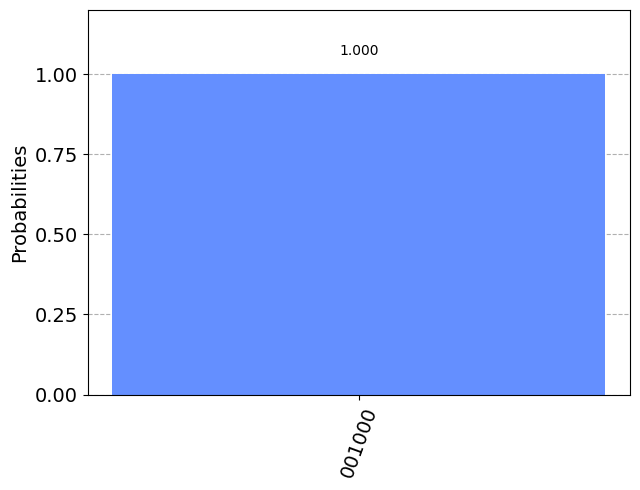

In [132]:
p2.printHist()

## IBM Simulators
Using the IBM machines to simulate the answers to check the accuracy of the answers simulated on our local machines. The IBM machine used for this example is 'ibmq_athens'. The IBM machine gives a variety of answers at different probabilities. This can be seen in the histogram below. The quantum computers take the given circuit and break it down and expand the number of gates used. This is done to create a larger simulation process. This makes the IBM machines sensitive and thus prone to error. The correct answer still has the highest output probability in the IBM machine, while with the simulator the correct answer has a probabilty of 1.

In [144]:
qcomp = provider.get_backend('ibmq_athens')

In [145]:
job = execute(qcz,qcomp)

In [146]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


In [147]:
result = job.result()

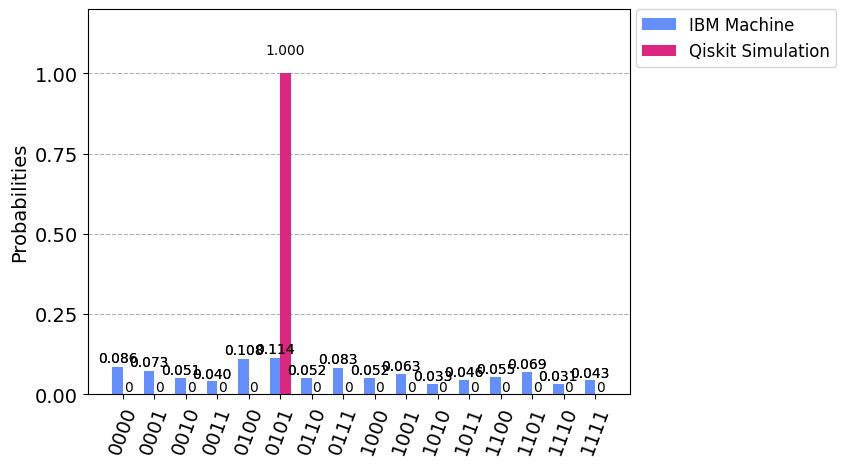

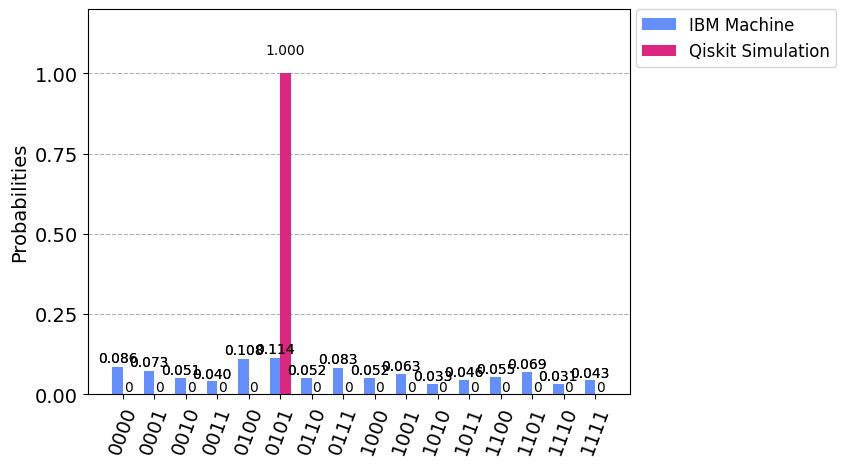

In [148]:
legend = ['IBM Machine', 'Qiskit Simulation']
plot_histogram([result.get_counts(qcz),count1], legend = legend)

Using classes to implement the task is useful. The addition class consists of three functions: add(),draw() and printHist(). Object-orientated programming allows the user to use broad definitions to complete tasks. The programme is able to scale up and down to achieve the function of adding binary numbers. The 3 and 5 qubit adders are stored in seperate objects and can manipulated seperately. The class can be further scaled up by adding extra functionality in the class and making the programme more dynamic.

The circuit can add numbers that are a more than 5 bits but as the its increase the circuit runtime would increase, and chance for error will increase (In the case of the IBM machines). The circuit construncted will have a set number of qubits regardless of the size of the number, but the classical bits will continously increase as the size of the number increases. As of now the circuit is only able to add values that have the same number of bits, therefore limiting the full adder.

# Conclusion

The task of creating a 3 and 5 bit adder using a class was acheived. From the IBM machines we observed an anwser that is displayed in a different manner than that of the qasm_simulator. The report discussed the creation of the adder as well as its limitations. 

# References
* https://qiskit.org/textbook/ch-states/introduction.html
* "Explanation of half adder and full adder with truth table", EL-PRO-CUS.  https://www.elprocus.com/half-adder-and-full-adder/. 
* "Quantum Half-Adder and Full-Adder", Manushanka